# Projeto Final

### Curso: Data Science
### Aluno: Mario Rocha Junior

Este é o projeto final do curso de Data Science que consiste em aplicar os conhecimentos adquiridos ao longo do curso. Para isso, foi escolhida uma competição da plataforma Kaggle denominada "Santander Customer Transaction Prediction" que pode ser vista no seguinte endereço: https://www.kaggle.com/c/santander-customer-transaction-prediction/overview.

Esta competição tem como objetivo criar um modelo de Machine Learning que tenha a capacidade de fazer uma previsão se os respectivos clientes farão ou não uma determinada transação bancária futuramente (ou seja, trata-se de uma previsão binária). Para isso, a competição dispõe de 2 (dois) datasets, onde um refere-se ao dataset de treino e o segundo de teste, ou seja, o responsável por fazermos as previsões.

Uma importante observação é que cada dataset apresenta-se de forma anônima onde as "features" somam no total de 200 variáveis e sendo representada por dados numéricos. Além disso, a primeira coluna refere-se à identificação de cada transação e a variável "target", como dito anteriormente, podendo assumir os valores 0 e 1. Outra observação é que cada dataset apresenta 200 mil registros cada um.

## Desenvolvimento do projeto

Aqui iniciaremos o desenvolvimento do projeto e para isso iremos de antemão as bibliotecas que serão utilizadas nesta primeira etapa do trabalho. A seguir iremos carregar os dados em uma variável Python e posteriormente visualizar os dataframes gerados.

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


### Análise exploratória de dados

Esta é a primeira etapa do projeto onde começamos a entender os dados que temos em mãos. Para isso, utilizaremos gráficos e análises de grandezas estatísticas para definir os rumos que o trabalho tomará em direção à resolução do problema.

#### - Verificando valores nulos

Aqui iniciaremos nosso trabalho de exploração dos dados procurando por valores nulos nas colunas do dataframe. Para isso, escrevemos uma função que retornará a quantidade de valores nulos (se houver) em cada coluna.

In [5]:
# Verificando se há elementos nulos
def null_values(dataframe):
    """ Function that check null values of each column from dataframe.
    :param dataframe: Dataframe that you want to search null values from.
    :return: The columns with null values.    
    """
    col = dataframe.columns
    for c in col:
        null = dataframe[c].isna().sum()
        if null != 0:
            print(c, null)
        else:
            print(f'A coluna {c} não tem elementos nulos!')

In [6]:
%%time
# null_values(df_train)

Wall time: 0 ns


Após chamar a função "null_values" será observado que não há valores nulos neste dataframe. Uma outra função mais simples foi construida abaixo e pode-se confirmar o resultado obtido anteriormente.

In [7]:
# Outra função para determinar elementos nulos nas colunas
def null_values_2(dataframe):
    """ Function that check null values of each column from dataframe.
    :param dataframe: Dataframe that you want to search null values from.
    :return: The columns with null values.    
    """
    cont = 0
    for col in dataframe.columns:
        null = dataframe[col].isnull().sum()
        if null != 0:
            print(f'Coluna {col} com {null} valores nulos.')
            cont += 1
    if cont == 0:
        print('Não há nenhuma coluna com valores nulos.')

In [8]:
null_values_2(df_train)

Não há nenhuma coluna com valores nulos.


Confirmamos que realmente não existem valores nulos em nenhuma das colunas.

#### - Correlação entre as features

Para visualizar a correlação podemos plotar um gráfico chamado "heat map" e assim facilitar a visualização desta variável.

In [9]:
%%time
# Verificando a correlação entre as variáveis
def correlation_plot(dataframe):
    fig = plt.figure(figsize=(20,20))
    correlation = dataframe.corr()
    sns.heatmap(data=correlation)
    plt.title('Correlação')
    plt.show()

Wall time: 0 ns


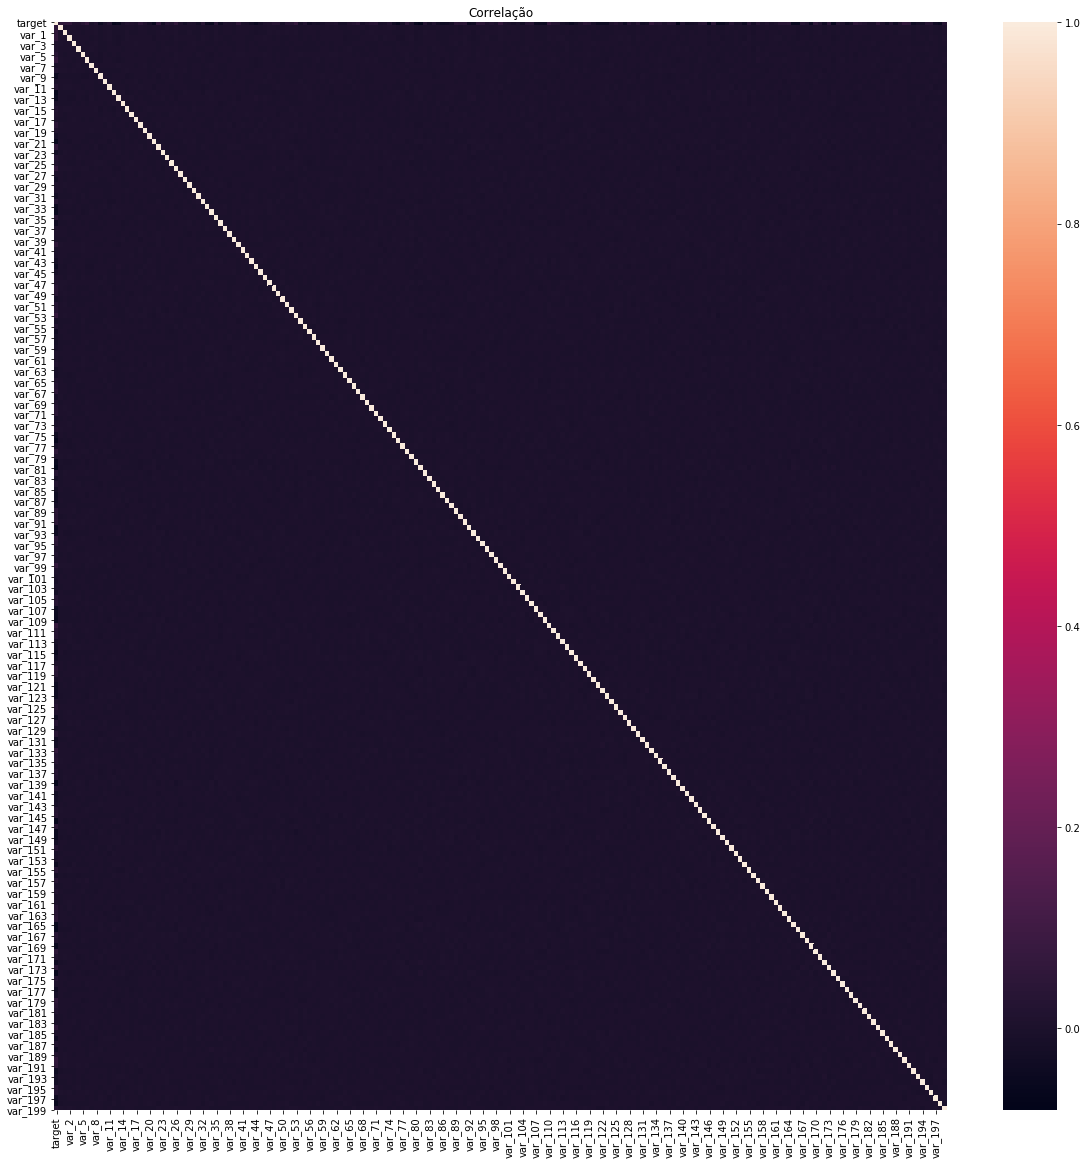

Wall time: 42.3 s


In [10]:
%%time
correlation_plot(df_train)

Note não há nenhuma correlação relevante entre as variáveis. 

#### - Outros gráficos

Quantidade de elementos por target.

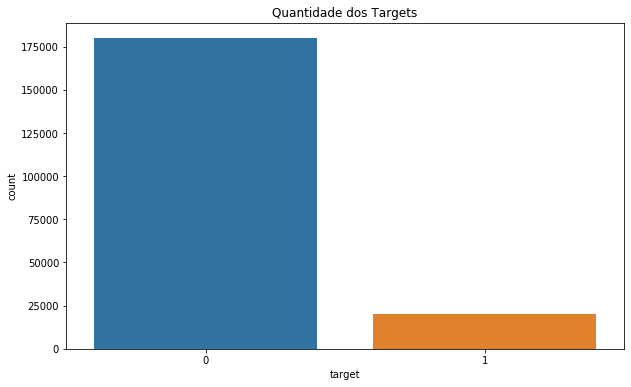

Wall time: 496 ms


In [11]:
%%time
# Verificando a quantidade de elementos por cada target
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df_train, x='target')
plt.title('Quantidade dos Targets')
plt.show()

Distribuição média das features.

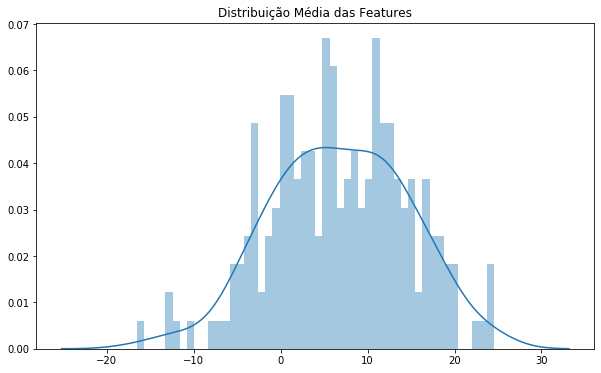

Wall time: 908 ms


In [12]:
%%time
# Distribuição da média de cada feature
fig = plt.figure(figsize=(10,6))
col = df_train.columns[2:]
medias = []
for c in col:
    media = df_train[c].mean()
    medias.append(media)
sns.distplot(a=medias, bins=50)
plt.title('Distribuição Média das Features')
plt.show()

Distribuição do desvio padrão de cada feature.

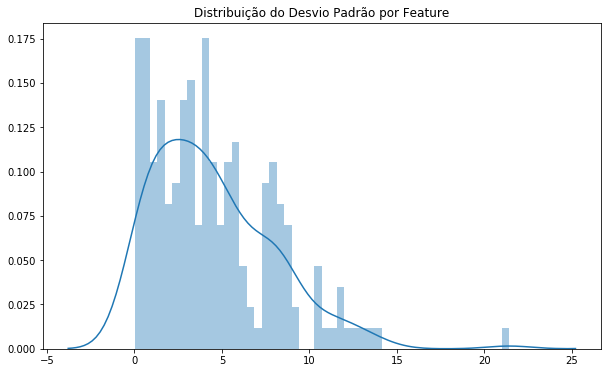

Wall time: 531 ms


In [13]:
%%time
# Distribuição do desvio padrão de cada feature
fig = plt.figure(figsize=(10,6))
col = df_train.columns[2:]
stds = []
for c in col:
    std = df_train[c].std()
    stds.append(std)
sns.distplot(a=stds, bins=50)
plt.title('Distribuição do Desvio Padrão por Feature')
plt.show()

Distribuição dos valores máximos e mínimos de cada coluna.

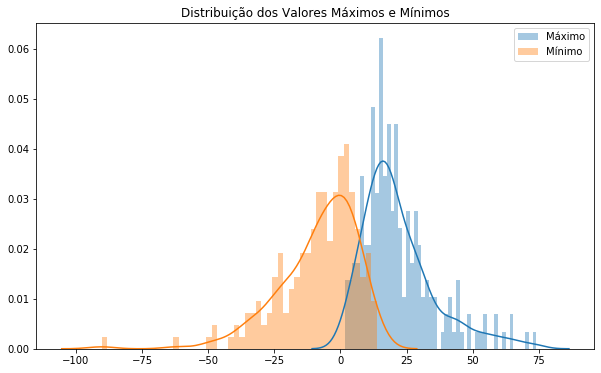

Wall time: 806 ms


In [14]:
%%time
# Distribuição dos valores máximos e mínimos
fig = plt.figure(figsize=(10,6))
col = df_train.columns[2:]
maxi = []
mini = []
for c in col:
    maximum = df_train[c].max()
    minimum = df_train[c].min()
    maxi.append(maximum)
    mini.append(minimum)
sns.distplot(a=maxi, bins=50, label='Máximo')
sns.distplot(a=mini, bins=50, label='Mínimo')
plt.title('Distribuição dos Valores Máximos e Mínimos')
plt.legend()
plt.show()

#### Verificando outliers

In [15]:
# Visualizando os outliers graficamente
def plot_feature_scatter(df1, features):
    """ Function that return boxplot for all columns from dataframe.
    :param dataframe: Dataframe that you want to plot the outliers from.
    :return: The boxplot for each column.    
    """
    i = 0
    sns.set_style('whitegrid')
    plt.figure(figsize=(40,2000))
    fig, ax = plt.subplots(50, 4,figsize=(30,600))

    for feature in features:
        i += 1
        plt.subplot(50, 4, i)
        sns.boxplot(y=df1[feature])
        fig.tight_layout()
        plt.xlabel(feature, fontsize=15)
    plt.show()

In [62]:
%%time
features = df_train.columns[2:]
plot_feature_scatter(df_train[::], features)

<Figure size 2880x144000 with 0 Axes>

Wall time: 48min 58s


In [16]:
def show_outliers(dataframe):
    """ Function that prints the maximum and minimun outliers for each column of Dataframe. Plus it gives the total numbers
    of outliers.
    :param dataframe: Dataframe that you want to check the outliers from.
    :return: The outliers itself and total number from each column.
    """
    total = 0
    for c in range(2, len(dataframe.columns)):
        columns_name = dataframe.columns[c]
        inf = dataframe.quantile(0.25)[c - 1] - 1.5 * (dataframe.quantile(0.75)[c - 1] - dataframe.quantile(0.25)[c - 1])
        sup = dataframe.quantile(0.75)[c - 1] + 1.5 * (dataframe.quantile(0.75)[c - 1] - dataframe.quantile(0.25)[c - 1])
        max_outliers = [value for key, value in enumerate(dataframe[columns_name]) if value > sup]
        min_outliers = [value for key, value in enumerate(dataframe[columns_name]) if value < inf]
        max_outliers.sort()
        min_outliers.sort()
        print(f'Coluna {columns_name}:' )
        if len(max_outliers) > 0:
            print(f'-> Outliers maiores: \n{max_outliers};')
        else:
            print(f'-> Outliers maiores: Não há outliers.')
        if len(min_outliers) > 0:
            print()
            print(f'-> Outliers menores: \n{min_outliers};')
        else:
            print(f'-> Outliers menores: Não há outliers.')
        print()
        print(f'Outliers superiores: {len(max_outliers)}. \nOutliers inferiores {len(min_outliers)}.')
        print(f'Total de outliers: {len(max_outliers) + len(min_outliers)}.')
        total += len(max_outliers) + len(min_outliers)
        print()
        max_outliers.clear()
        min_outliers.clear()
    print(f'Total de outliers no dataframe: {total}.')

In [17]:
%%time
# show_outliers(df_train)

Wall time: 0 ns


Há 26536 outliers no dataframe, o que representa uma porcentagem de: 13.268%.

Podemos agora verificar os valores máximo e mínimo de cada coluna.

In [18]:
def max_min_values(dataframe):
    """ Function that returns the maximum and minimun values each column of Dataframe but outliers. Plus it gives the 
    total numbers of outliers.
    :param dataframe: Dataframe that you want to study.
    :return: Dataframe with both maximum and minimum values.
    """
    dictionary = {}
    for c in range(2, len(dataframe.columns)):
        columns_name = dataframe.columns[c]
        inf = dataframe[columns_name].quantile(0.25) - 1.5 * (dataframe[columns_name].quantile(0.75) - dataframe[columns_name].quantile(0.25))
        sup = dataframe[columns_name].quantile(0.75) + 1.5 * (dataframe[columns_name].quantile(0.75) - dataframe[columns_name].quantile(0.25))
        dictionary[columns_name] = [inf, sup]
        df = pd.DataFrame(data=dictionary, index=['Menor', 'Maior'])
    return df

In [19]:
%%time
max_min_values(df_train)

Wall time: 10.1 s


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Menor,1.997325,-13.8880,3.031137,0.649038,6.31625,-29.388075,2.91475,6.20515,-10.20135,3.670363,...,-9.756362,-1.375287,-2.199813,-7.8472,8.479713,-4.17115,-14.7024,6.24205,7.477163,-35.276387
Maior,19.214725,10.5066,18.208038,12.929137,15.82805,19.112525,7.85595,26.84155,10.82145,11.532862,...,16.103738,16.045212,6.039088,14.6376,27.546612,3.83005,19.3122,11.60405,24.417262,28.904712


#### Tratando os outliers

Iremos agora para o próximo passo da nossa análise que consiste em realizar o tratamento dos outliers encontrados no dataframe. Para isso, iremos fazer duas análises: 

i) Substituir tais valores pela mediana de cada coluna;

ii) Deletar todos os registros que represantam outliers no dataframe.

Por fim, de posse de ambos os dataframes tratados iremos verificar qual deles oferece a melhor acurácia no modelo de machine learning que pretendemos obter.

##### 1) Substituição pela mediana

Nesta etapa, criamos uma função quer recebe um dataframe, verifica os outliers em cada coluna e o substitui pelo valor da mediana da respectiva coluna.

In [29]:
def treat_outliers(dataframe):
    for c in range(2, len(dataframe.columns)):
        columns_name = dataframe.columns[c]
        inf = dataframe[columns_name].quantile(0.25) - 1.5 * (dataframe[columns_name].quantile(0.75) - dataframe[columns_name].quantile(0.25))
        sup = dataframe[columns_name].quantile(0.75) + 1.5 * (dataframe[columns_name].quantile(0.75) - dataframe[columns_name].quantile(0.25))
        median = dataframe[columns_name].median()
        for value in dataframe[columns_name]:
            if value > sup or value < inf:
                dataframe[columns_name] = dataframe[columns_name].replace(value, median)

In [30]:
%%time
treat_outliers(df_train)

Wall time: 1min 15s


Após repetir o processo várias vezes foi possível extrair todos os outliers do dataframe ao substitui-los pela mediana dos valores de cada coluna. Podemos agora usar um segundo métdodo para tratamento de outliers que consiste na remoção dos mesmos.

#### 2) Remoção dos outliers

Segue a função quer recebe um dataframe e retira os seus outliers.

In [16]:
index = []
def delete_outliers(dataframe):
    for c in range(2, len(dataframe.columns)):
        columns_name = dataframe.columns[c]
        inf = dataframe.quantile(0.25)[c - 1] - 1.5 * (dataframe.quantile(0.75)[c - 1] - dataframe.quantile(0.25)[c - 1])
        sup = dataframe.quantile(0.75)[c - 1] + 1.5 * (dataframe.quantile(0.75)[c - 1] - dataframe.quantile(0.25)[c - 1])
        for key, value in enumerate(dataframe[columns_name]):
            if value > sup or value < inf:
                index.append(key)
    df_copy = dataframe.copy()
    df_copy.drop(axis=0, index=index, inplace=True, errors='ignore')
    return df_copy

In [39]:
%%time
no_outliers_train = delete_outliers(df_train)

Wall time: 34min 16s


Foram retirados 24896 outliers, representando 12.448% da base original.

### Pré-processamento dos dados

Como dito anteriormente, nosso objetivo neste projeto é criar um modelo de Machine Learning capaz de fazer uma previsão se um cliente do banco fará ou não uma determinada transação (baseado em seus dados pessoais). Entretanto, antes de chegar a tal parte precisamos fazer um pré-processamento dos dados para termos certeza que usaremos dados com uma certa qualidade, uma vez que esta qualidade está diretamente relacionada à acurácia do modelo em questão. Segue então este processo abaixo.

#### Standard Scaler

O comando Standard Scaler é muito utilizado para colocar todos os dados de cada feature em uma mesma escala.

In [22]:
# Divisão entre base previsores (features) e classe (target)
previsores = df_train.iloc[:, 2:].values
classe = df_train.iloc[:,1].values

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
previsores = scaler.fit_transform(previsores)

In [26]:
previsores

array([[-0.57710174, -1.27373702,  0.45170728, ..., -0.37396811,
        -1.02639785,  0.21413482],
       [ 0.26995857, -0.62213756,  1.19036045, ..., -0.12939961,
         0.82541712,  0.50568523],
       [-0.68111341, -0.2760664 ,  0.51698836, ..., -0.69514059,
        -0.38144932,  0.35668144],
       ...,
       [ 0.17870987, -0.84546901, -0.07667568, ..., -0.20904171,
        -0.67680579,  0.72102365],
       [-0.31746727, -1.72398014,  1.09630117, ...,  1.22180338,
        -0.11352617, -1.01298853],
       [ 0.06456676, -1.00810962,  0.53130173, ..., -0.78389704,
        -1.24290845,  0.33196403]])

### Criação do Modelo

Nesta etapa do projeto iremos criar um modelo utilizando o algorítmo de Machine Learning conhecido como Naive Bayes. O princípio do algorítmo se baseia em criar uma tabela de probabilidade a partir dos dados de treino e a seguir calcular a probabilidade de cada registro da base de treino se enquadrar nas classes 1 ou 2.

In [19]:
# Importando as bibliotecas necessárias
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [20]:
# Separação da base de dados em treino e teste
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

In [51]:
%%time
# Criação do modelo
resultados = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = GaussianNB()
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento])
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    resultados.append(precisao)

Wall time: 46.4 s
Parser   : 118 ms


In [52]:
resultados = np.array(resultados)
resultados.mean()

0.9213749999999999

- Score com outliers: 

1) Sem pré-processamento: 0.9213749999999999

2) Scaler: 0.9213749999999999

- Score sem outliers:

1) Sem pré-processamento: 0.9213775914806842

2) Scaler: 0.9213775914806842

Resultado:

Este modelo criado com o algorítmo Naive Bayes apresentou uma acurácia de aproximadamente 92,13% ao usarmos a base completa, ou seja, com a presença dos outliers. Note ainda que neste caso o pré-processamento com o Scaler não fez diferença e apresentou exatamente o mesmo resultado sem realizá-lo.
Realizando o mesmo com a base sem os outliers o resultado ficou praticamente o mesmo, apresentando uma leve superioridade verificada apenas na 6ª casa decimal.

### Testando outros modelos

Nesta etapa, tentaremos melhorar o modelo conseguido com o Naive Bayes e para isso usaremos outros algorítmos para criar diferentes modelos para no fim, compararmos os seus resultados. 

Aqui, vale uma observação: usaremos aqui a base de dados com os outliers, uma vez que sua presença não fez diferença significativa para precisão do modelo. 

#### 1) Random Forest 

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
%%time
resultados = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = RandomForestClassifier(n_estimators=10, criterion='entropy')
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento])
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    resultados.append(precisao)

Wall time: 20min 31s


In [72]:
resultados = np.array(resultados)
resultados.mean()

0.899785

### 2) K-nearest neighbours (KNN)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
%%time
resultados = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento])
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    resultados.append(precisao)

Wall time: 7h 31min 4s


In [45]:
resultados = np.array(resultados)
resultados.mean()

0.8994349999999999

Resultado: Acurácia de aproximadamente 89,94%.

### 3) Regressão Logística

In [17]:
from sklearn.linear_model import LogisticRegression

In [27]:
%%time
resultados = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = LogisticRegression()
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento])
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    resultados.append(precisao)

Wall time: 58.3 s


In [28]:
resultados = np.array(resultados)
resultados.mean()

0.9142199999999999

Resultado: Acurácia de aproximadamente 91,42%.

### 4) Redes Neurais Artificiais

In [31]:
from sklearn.neural_network import MLPClassifier

In [37]:
%%time
resultados = []
for indice_treinamento, indice_teste in kfold.split(previsores, np.zeros(shape=(previsores.shape[0], 1))):
    classificador = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,100,100), batch_size=200)
    classificador.fit(previsores[indice_treinamento], classe[indice_treinamento])
    previsoes = classificador.predict(previsores[indice_teste])
    precisao = accuracy_score(classe[indice_teste], previsoes)
    resultados.append(precisao)


Wall time: 2h 26min 27s


In [38]:
resultados = np.array(resultados)
resultados.mean()

0.873365

Resultado: Acurácia de aproximadamente 87,34%.

### Resultados

Com outliers (base df_train):

- Sem pré-processamento:

1) Naive Bayes: 0.9213749999999999

2) Random Forest (10 árvores): 0.899785

3) Regressão Logística: 0.9141349999999999

4) Redes Neurais Artificiais: 0.873365

- Com pré-processamento (Scaler):

KNN: 0.8994349999999999

### Conclusão

Ao analizarmos os resultados obtidos concluímos que o melhor modelo obtido foi utlizando o algorítmo Naive Bayes, que atingiu uma acurácia de 92,14% de precisão tanto para a base com outliers quanto para a base sem a presença deles, ou seja, ambos os modelos ficaram "empatados" quanto a sua precisão. Verificamos ainda que para o pré-procesamento também nao fez diferença e os resultados foram os mesmos fazendo-o ou não.